Now that we know the basics of python, we can try to do something useful with it.

In the working directory of this notebook is a file called [planets.csv](planets.csv). This contains data on all confirmed exoplanets found by NASA, taken from [here](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets). It has several columns for different attributes of the planets. Each row is the data on one planet. The details of each column are described in [planets-db-info.txt](planets-db-info.txt).

We're going to read in the file and do some simple analysis on the data. The easiest way to read the data is using the `DictReader` class from the [`csv`](https://docs.python.org/3/library/csv.html) module.

In [9]:
from csv import DictReader

with open('planets.csv') as dbfile :
    dbreader = DictReader(dbfile)
    planets = list(dbreader)

<class 'dict'>


Now, `planets` is a `list` with one `dict` per planet in the database. Each `dict` has a key and value for each column in the database.

In [ ]:
# Print all the info on the first planet:
for column, value in planets[0].items() :
    print(column.ljust(20), value)

Now use the list of planets to:
- Find the nearest and farthest planets (using the "st_dist" column).
- Find the average of the planet mass (in Jupiter masses, using "pl_masse") and the average of the planet temperature (using "pl_eqt").
- Count how many planets have been found each year (using "pl_disc").
- Calculate a measure of how Earth-like each planet is using $(\mathrm{pl\_masse}-1)^2 + \left(\frac{\mathrm{pl\_eqt}-300}{300}\right)^2 + (\mathrm{pl\_orbeccen}\times 10)^2$. "pl_orbeccen" is the orbital eccentricity of the planet (how elliptical it is). Find the planet that's most Earth-like (has the lowest value of this measure).

Note that the column values are all read in as strings, so you'll need to convert to `float` as necessary. Also, not all planets have values for every column, so you should skip those that're missing the column of interest.

In [19]:
lg=0
sm=1e6
for i in planets:
    if i['st_dist']!='':
        if float(i['st_dist'])>lg:
            lg=float(i['st_dist'])
        if float(i['st_dist'])<sm:
            sm=float(i['st_dist'])

print(lg, sm)

m=0
for i in planets:
    if i['pl_masse']!='':
        m+=float(i['pl_masse'])
m/=len(planets)
print(m)

8500.0 1.29
138.6705061312518


As mentioned, [matplotlib](https://matplotlib.org/index.html) is great for graphical output in data analysis. Try to find out how to use `matplotlib.pyplot.hist` to make a histogram of the planets' orbital period ("pl_orbper"). This has quite a large range of values though the majority of planets in the database have quite short orbital periods, so you'll want to restrict the range between 0 and 200.

Remember to use `help` to find out more about a function, or object.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

Try plotting some other properties like planet mass, or equilibrium temperature. How could you make this process more automated?

In [35]:
def propplot(planets, prop, nbins, xmin, xmax) :
    ''' This function is designed to plot multiple properties of planets. 
    This should only work for properties that are supposed to be numbers.'''
    
    propertylist = []
    for i in planets:
        if i[prop]!='':
            planetprop = float(i[prop])
            propertylist.append(planetprop)
                
    plt.hist(propertylist,nbins,[xmin,xmax])
    plt.show()

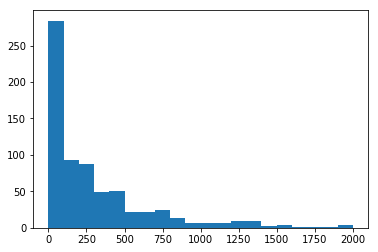

In [36]:
propplot(planets,'pl_masse',20,0,2000)

Now try using `matplotlib.pyplot.hist2d` to make a plot of planet equilibrium temperature (in the range 0-3000) vs star effective temperature ("st_teff", in the range 0-10000).

In [90]:
def propplot2d(planets, prop1, prop2, bins, xmin=0, xmax=0, ymin=0, ymax=0) :
    ''' This function is designed to plot multiple properties of planets. 
    This should only work for properties that are supposed to be numbers.'''
    
    propertylist1 = []
    propertylist2 = []
    for i in planets:
        if i[prop1]!='' and i[prop2]!='':
            planetprop1 = float(i[prop1])
            propertylist1.append(planetprop1)
            planetprop2 = float(i[prop2])
            propertylist2.append(planetprop2)
    if ymin==0 and ymax==0:
        yran=[min(propertylist2), max(propertylist2)]
    else:
        yran=[ymin, ymax]
    if xmin==0 and xmax==0:
        xran=[min(propertylist1), max(propertylist1)]
    else:
        xran=[xmin, xmax]
    
    print(xran) 
        
    plt.hist2d(propertylist1, propertylist2)#, [bins,bins], [xran,yran])
    
    return propertylist1, propertylist2

[131.0, 4050.0]


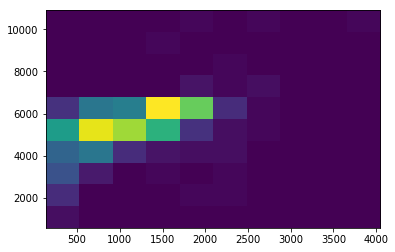

In [75]:
propplot2d(planets, 'pl_eqt', 'st_teff',20,0,0,0,0) 

Try doing planet equilibrium temperature vs orbital period (in the range 0-200). How about vs 1/(orbital period) (in the range 0-1)?

[50.0, 4050.0]


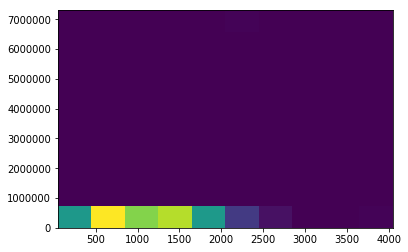

In [76]:
propplot2d(planets, 'pl_eqt', 'pl_orbper',20,0,0,0,200) 

Now try using [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) to fit a straight line to the data used to make these plots.

In [105]:
from numpy import polyfit
from numpy import multiply

With lists, you cannot multiply them in a straightforward fashion as you would a number. For example, you cannot do [1,2,3] $\times$ 4 and expect to get [4,8,12]. In this instance, you have to use the multiply functon from numpy.

In [106]:
multiply([1,2,3],4)

array([ 4,  8, 12])

[131.0, 4050.0]


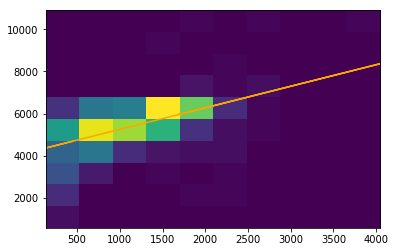

In [108]:
a,b = propplot2d(planets, 'pl_eqt', 'st_teff',20)
m,c=polyfit(a,b,1)
plt.plot(a, (multiply(m,a)+c), 'orange')

Implement the 2D plotting and fitting as fuctions in your class.

If you think of something else to try, go ahead! See what interesting info you can extract from the database.

If you want to try some different challenges, have a look at [Project Euler](https://projecteuler.net/).